## 4.6 実習: ロジスティック回帰、線形判別分析、二次判別分析、K再近傍法

In [215]:
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

/home/nariaki/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### 4.6.1 株価データ

In [60]:
dataset_path = "./datasets/Smarket.csv"
df = pd.read_csv(dataset_path, index_col=0)
df.Direction = df.Direction.astype('category')
df.head(3)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down


In [69]:
enc = lambda x: 0 if x == 'Up' else 1
df['b_Direction'] = df.Direction.apply(enc)
df.head(3)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,b_Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,0
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,0
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,1


In [70]:
df.isnull().sum(), df.isna().sum()

(Year           0
 Lag1           0
 Lag2           0
 Lag3           0
 Lag4           0
 Lag5           0
 Volume         0
 Today          0
 Direction      0
 b_Direction    0
 dtype: int64, Year           0
 Lag1           0
 Lag2           0
 Lag3           0
 Lag4           0
 Lag5           0
 Volume         0
 Today          0
 Direction      0
 b_Direction    0
 dtype: int64)

In [71]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


/home/nariaki/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/nariaki/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


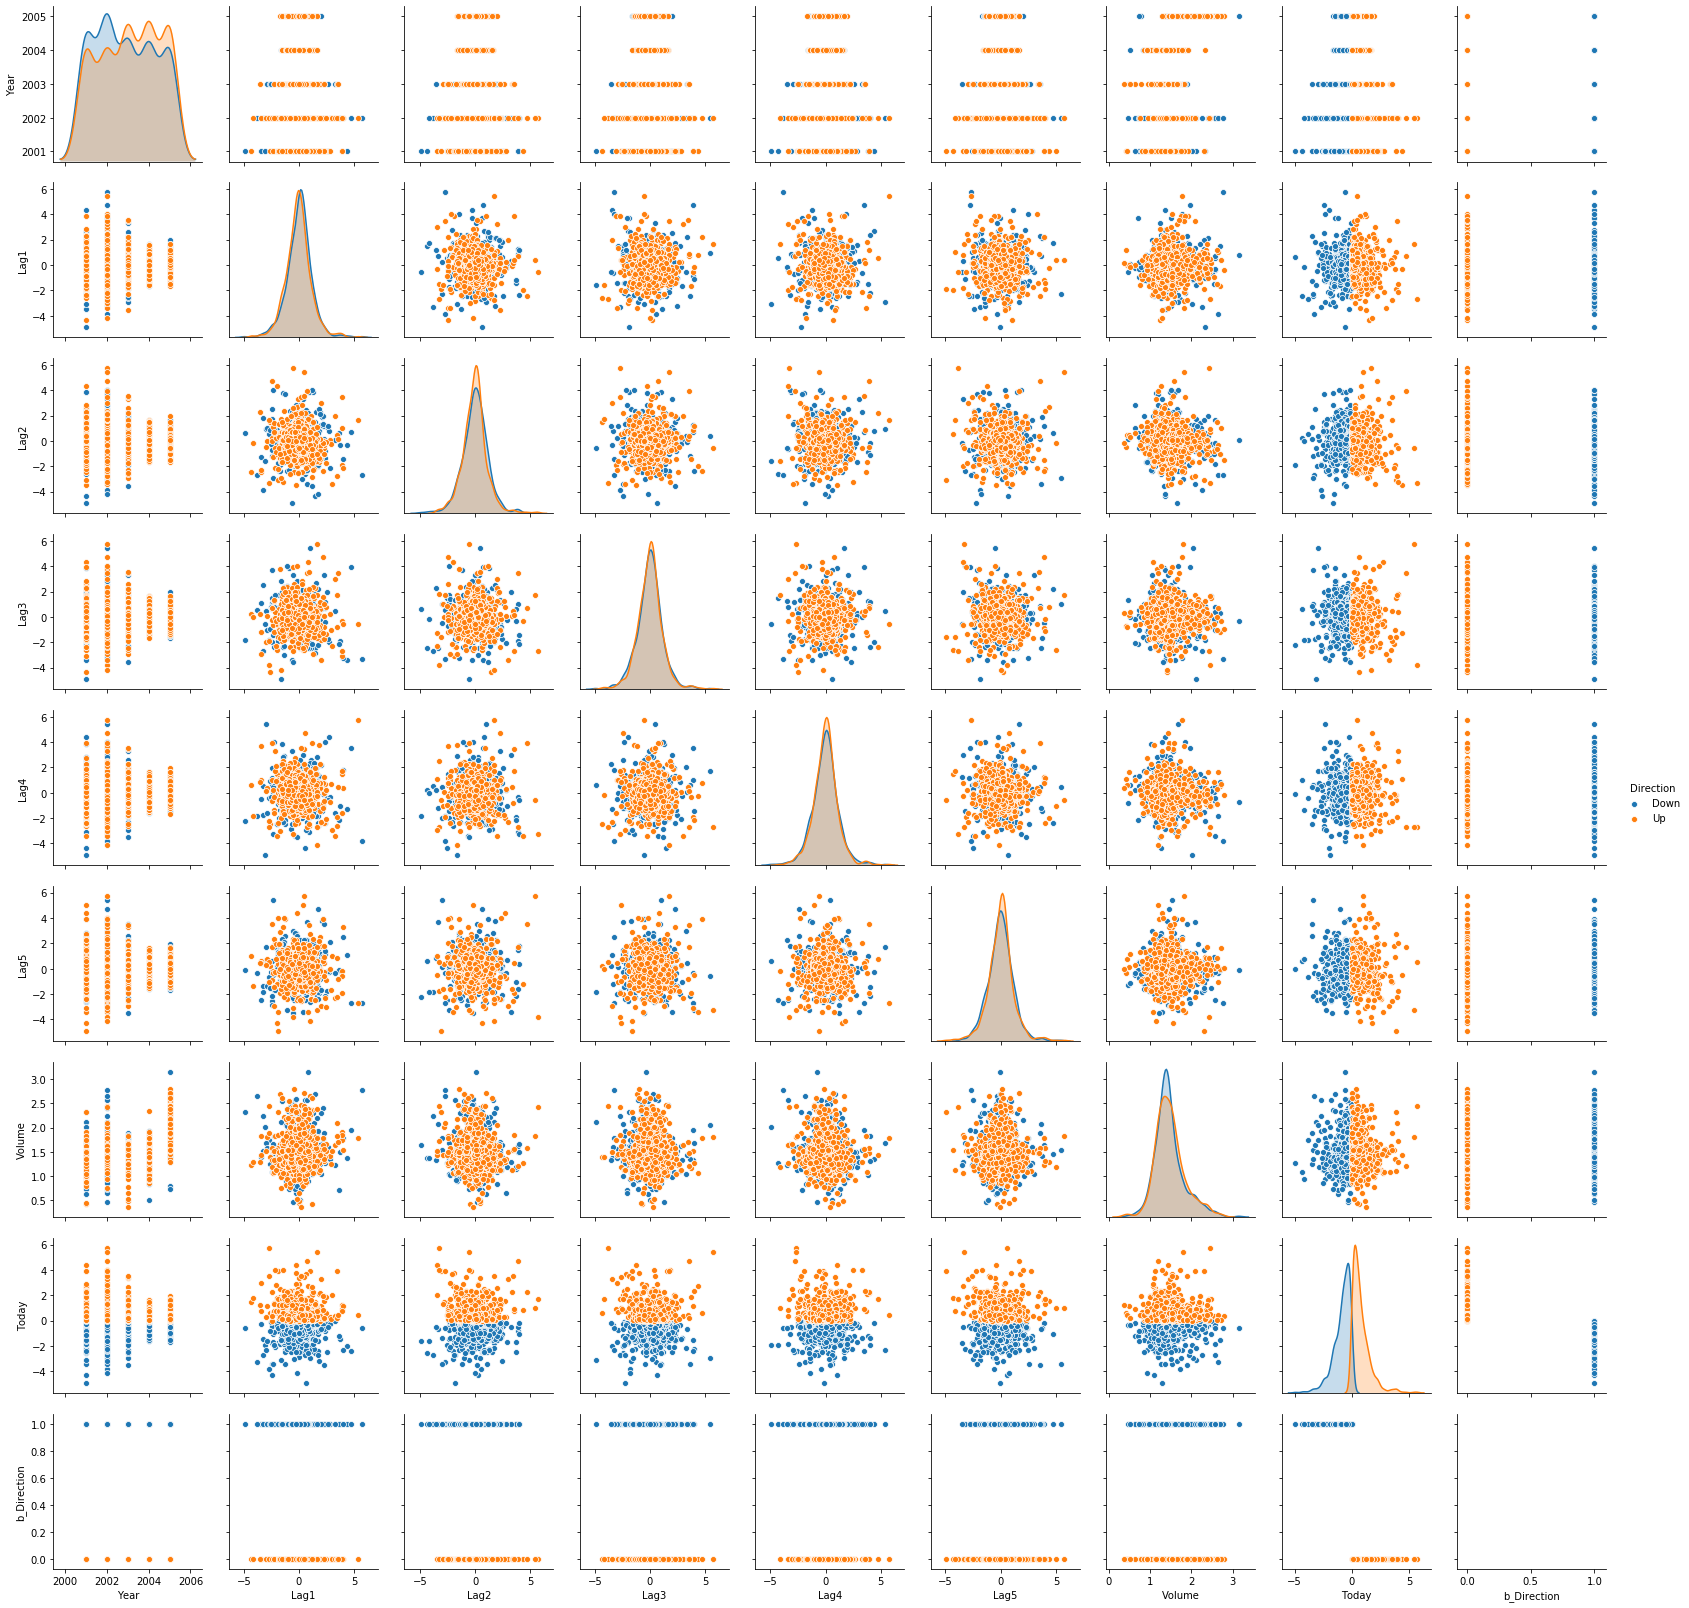

In [72]:
sns.pairplot(df, hue='Direction')

In [73]:
df.corr(method='pearson')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


### 4.6.2 ロジスティック回帰

In [119]:
X = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]
y = pd.get_dummies(df.Direction).iloc[:, 1]

#### sklearn

In [152]:
log_reg_model  = linear_model.LogisticRegression()

In [153]:
log_reg_model.fit(X, y)

LogisticRegression()

In [154]:
log_reg_model.coef_, log_reg_model.intercept_

(array([[-7.09284569e-05, -7.11445800e-02, -4.40195560e-02,
          9.21499652e-03,  7.19255348e-03,  9.28840685e-03]]),
 array([0.07424345]))

In [155]:
log_reg_model.predict(X)

array([1, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [156]:
confusion_matrix(log_reg_model.predict(X), y)

array([[114,  98],
       [488, 550]])

#### statsmodels

In [141]:
X = sm.add_constant(X)

In [142]:
model = sm.Logit(y, X)

In [143]:
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 1.820150
         Iterations 4


/home/nariaki/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/nariaki/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/nariaki/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1244
Method:                           MLE   Df Model:                            5
Date:                Mon, 07 Jun 2021   Pseudo R-squ.:                     inf
Time:                        10:06:38   Log-Likelihood:                -2275.2
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0742      0.057      1.309      0.191      -0.037       0.185
Lag1          -0.0713      0.050     -1.424      0.155      -0.170       0.027
Lag2          -0.0441      0.050     -0.882      0.378      -0.142       0.054
Lag3           0.0092      0.050      0.185      0.853      -0.089       0.107
Lag4           0.0072      0.050      0.145      0.885      -0.091       0.105
Lag5           0.0093      0.049      0.188      0.851      -0.088       0.106
==============================================================================
"""

#### 2001~2004をもとに2005を予測

In [163]:
dfy = df.groupby(df.Year)

In [168]:
years = df.Year.unique()

In [174]:
first = True
for year in years[:4]:
    if first:
        df_train = dfy.get_group(year)
        first = False
    else:
        df_train = pd.concat([df_train, dfy.get_group(year)])

df_eval = dfy.get_group(years[-1])

In [200]:
X_train = df_train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]
y_train = pd.get_dummies(df_train.Direction).iloc[:, 1]

In [201]:
log_reg_model = linear_model.LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [202]:
X_eval = df_eval[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]
y_eval = pd.get_dummies(df_eval.Direction).iloc[:, 1]
y_pred = log_reg_model.predict(X_eval)

In [203]:
cm = confusion_matrix(y_eval, y_pred)

In [204]:
cm

array([[ 37,  74],
       [ 30, 111]])

In [205]:
(cm[0][0] + cm[1][1])/cm.sum()

0.5873015873015873

### 4.6.3 線形判別分析

In [194]:
lda_model = LinearDiscriminantAnalysis()

In [206]:
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [207]:
y_eval = lda_model.predict(X_eval)
cm = confusion_matrix(y_eval, y_pred)
cm

array([[ 67,   0],
       [  0, 185]])

In [199]:
(cm[0][0] + cm[1][1])/cm.sum()

1.0

In [209]:
lda_model.priors_, lda_model.means_

(array([0.49198397, 0.50801603]),
 array([[ 0.04279022,  0.03389409, -0.00980652, -0.01059878,  0.0043666 ],
        [-0.03954635, -0.03132544,  0.00583432,  0.00311045, -0.00065089]]))

### 4.6.4 二次判別分析

In [212]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
y_eval = qda_model.predict(X_eval)
cm = confusion_matrix(y_eval, y_pred)
cm

array([[ 45,  27],
       [ 22, 158]])

### 4.6.5 K最近傍法

In [217]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_eval = knn_model.predict(X_eval)
cm = confusion_matrix(y_eval, y_pred)
cm

array([[ 33,  74],
       [ 34, 111]])